# import the libraries

In [9]:
import tensorflow as tf # Import tensorflow library
import matplotlib.pyplot as plt # Import matplotlib library
import numpy as np # Import numpy library

# the object of the MNIST dataset and load the data

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,
      "x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


# Show one of the images from the training dataset

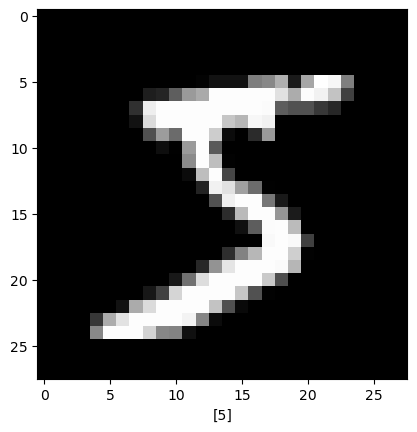

In [11]:

plt.imshow(x_train[0], cmap="gray") # Import the image
plt.xlabel([y_train[0]]) #Add label of the image
plt.show() # Plot the image

In [12]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # Normalize the training dataset
x_test = tf.keras.utils.normalize(x_test, axis=1) # Normalize the testing dataset

In [13]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Compling the model using adam optimization algorithm 

In [14]:
#Compling the model using adam optimization algorithm which is used for training Deep NN.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Start training process using train data sets

In [15]:

model_log=model.fit(x=x_train, y=y_train, batch_size=60, verbose=1, epochs=5, validation_split=.3)

Epoch 1/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8364 - loss: 0.6335 - val_accuracy: 0.9377 - val_loss: 0.2048
Epoch 2/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9534 - loss: 0.1550 - val_accuracy: 0.9569 - val_loss: 0.1383
Epoch 3/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9701 - loss: 0.0980 - val_accuracy: 0.9611 - val_loss: 0.1283
Epoch 4/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9799 - loss: 0.0677 - val_accuracy: 0.9658 - val_loss: 0.1130
Epoch 5/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9843 - loss: 0.0509 - val_accuracy: 0.9656 - val_loss: 0.1131


# model evaluation

In [16]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9657 - loss: 0.1152

Test Accuracy: 0.9696000218391418

Test Loss: 0.10306662321090698


# prediction 

In [17]:
predictions = model.predict([x_test]) # Make prediction using test data set

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
print(np.argmax(predictions[1])) # Print out the predicted number using index

2


In [19]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

# show one image from the test dataset

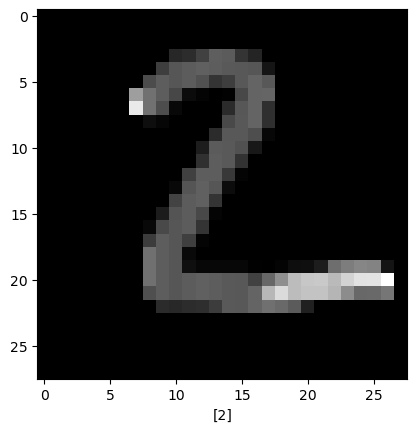

In [20]:

plt.imshow(x_test[1],cmap='gray') #Load the image
plt.xlabel([y_test[1]]) #Add label of the image
plt.show() # Plot the image

# plotting the graph for accuracy model

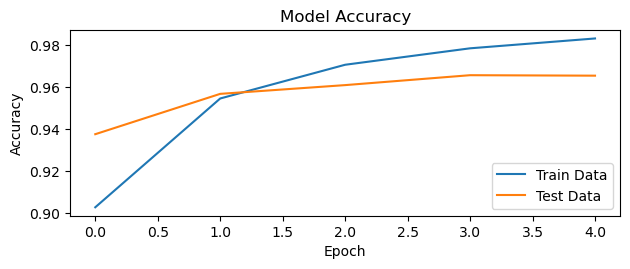

In [21]:
import os

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Data', 'Test Data'], loc='lower right')
plt.tight_layout()

# plotting the graph for loss model

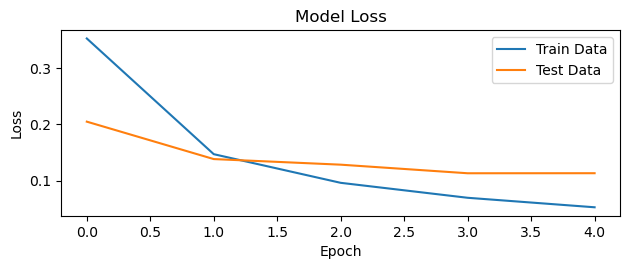

In [22]:

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Data', 'Test Data'], loc='upper right')
plt.tight_layout()

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("Predicted Label: {} Accuracy: {:1.0f}% True Label: {}".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)

# assign the number of rows and columns followed with images 

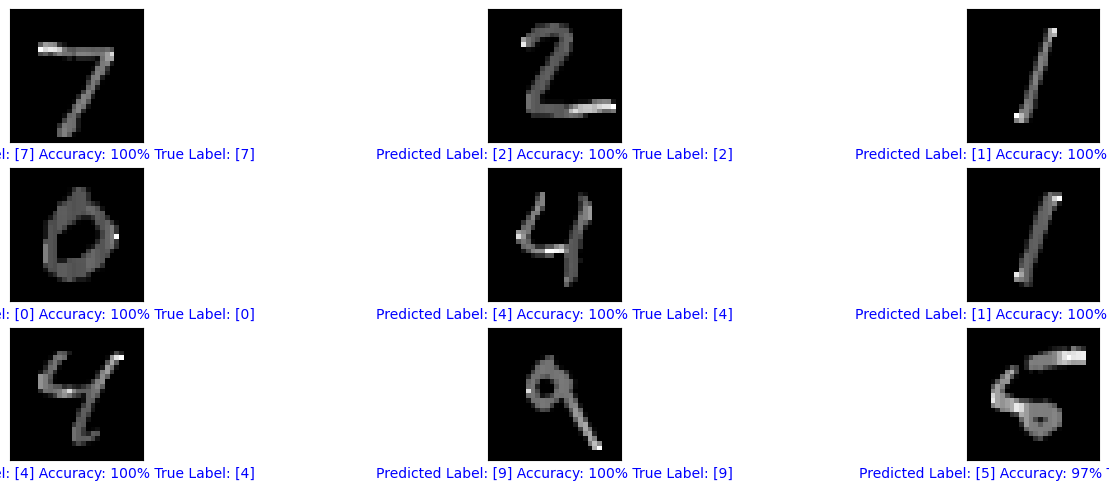

In [24]:

num_rows = 5
num_cols = 3
num_images = 9
plt.figure(figsize=(2*3*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  
plt.show()

In [28]:
mnist.("mnist.h5")
print("Model saved as mnist.h5")

SyntaxError: invalid syntax (579171742.py, line 1)